## 第七章-PAC与梯度上升法

### 7-1 什么是PCA?

主成分分析法 `Principal Component Analysis`

- 一个非监督的机器学习算法
- 主要用于数据的降维
- 通过降维, 可以发现更便于人理解的特征
- 其他应用: 可视化, 降噪

![](./picture/7-1-1.png)

![](./picture/7-1-2.png)

<font face="Courier New">

目标: **找到一条使得样本间间距最大的轴**<br>
使用方差(`Variance`)定义样本间的间距, $Var(x) = \frac{1}{m}\sum^{m}_{i=1}(x_{i} - \overline{x})^{2}$<br>
方差:描述样本整体分布的疏密的指标, 方差越大, 样本间越稀疏, 方差越小样本间越紧密, 因此, 目标转化为**找到使得样本最大方差**

![](picture/7-1-3.png)

<font face="Courier New">

$Var(x) = \frac{1}{m}\sum^{m}_{i=1}(x_{i} - \overline{x})^{2}$;其中 $\overline{x}=0$; 则: $Var(x) = \frac{1}{m}\sum^{m}_{i=1}x_{i}^{2}$

<font face="Courier New">

对所有的样本进行 `demean` 处理, 我们想要求一个轴的方向 `w = (w1, w2)`, 使得我们所有的样本, 映射到 w 以后, 得到: $$Var(X_{project}) = \frac{1}{m}\sum^{m}_{i=1}(X_{project}^{(i)} - \overline{X}_{project})^{2} ;其中X_{project}为映射后的样本.$$
$$Var(X_{project}) = \frac{1}{m}\sum^{m}_{i=1}||X_{project}^{(i)} - \overline{X}_{project}||^{2}$$
$$Var(X_{project}) = \frac{1}{m}\sum^{m}_{i=1}||X_{project}^{(i)}||^{2}$$
使得上述最后一个式子结果最大

![](picture/7-1-4.png)

![](picture/7-1-5.png)

**主成分分析与线性回归区别**

![](picture/7-1-6.png)

![](picture/7-1-7.png)

### 7-2 使用梯度上升法求解PCA问题

![](picture/7-1-6.png)

![](picture/7-2-1.png)

### 7-3 求数据的主成分PCA

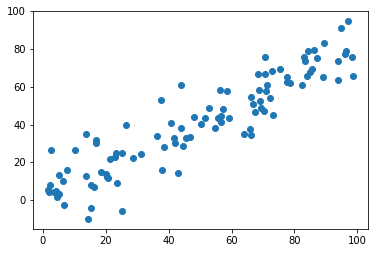

In [12]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0.0, 100.0, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3.0 + np.random.normal(0.0, 10.0, size=100)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### demean

In [48]:
def demean(X):
    return X - np.mean(X, axis=0)

**梯度上升法**

In [58]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [59]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2.0 / len(X)

In [60]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [61]:
def direction(w):
    return w / np.linalg.norm(w)  # 求 w 的模

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意1: 每次求一个单位方向
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [62]:
initial_w = np.random.random(X.shape[1]) # 注意2: 不能用0向量开始
initial_w

array([0.55818242, 0.18638022])

In [63]:
eta = 0.001

In [64]:
X_demean = demean(X)

**注意3: 不能使用`StandardScaler`标准化数据**, 因为使用`StandardScaler`将数据进行归一化处理之后方差变为1, 不符合 PAC 算法样本方差最大化这一目的!

In [65]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.7660432, 0.6427891])

In [69]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

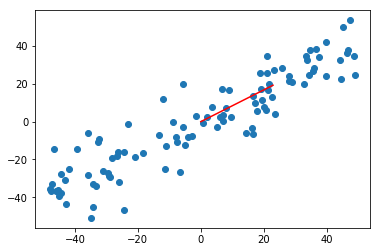

In [70]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*30], [0, w[1]*30], color="r")
plt.show()

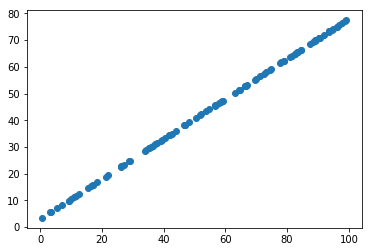

In [73]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0.0, 100.0, size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3.0
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [77]:
X2_demean = demean(X2)

In [78]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

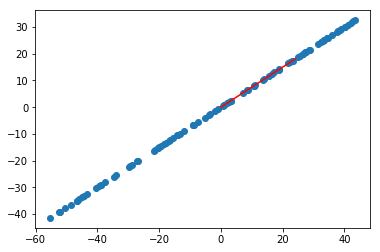

In [79]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color="r")
plt.show()

### 7-4 求数据的前n个主成分

![](picture/7-4-1.png)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [14]:
def demean(X):
    return X - np.mean(X, axis=0)

In [15]:
X = demean(X)

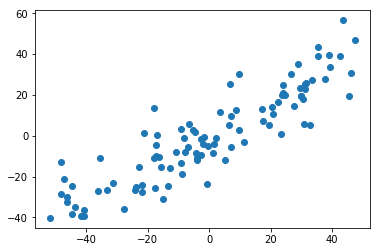

In [16]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [17]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) 
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [18]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.77121871, 0.63657026])

In [19]:
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

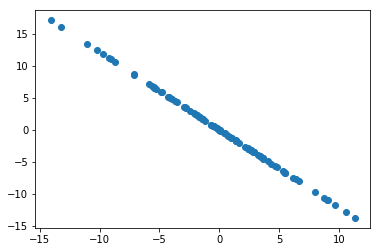

In [20]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [21]:
X2 = X - X.dot(w).reshape(-1, 1) * w

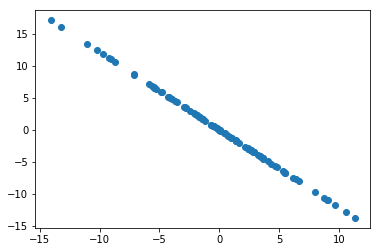

In [22]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [23]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.63656677,  0.77122159])

In [24]:
w.dot(w2)

4.520379219774551e-06

In [25]:
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [26]:
first_n_components(2, X)

[array([0.77121878, 0.63657018]), array([-0.63656685,  0.77122153])]

### 7-5 高纬度数据映射为低维数据

In [3]:
import numpy as np

class PCA:

    def __init__(self, n_components):
        """初始化PCA"""
        assert n_components >= 1, "n_components must be valid"
        self.n_components = n_components
        self.components_ = None

    def fit(self, X, eta=0.01, n_iters=1e4):
        """获得数据集X的前n个主成分"""
        assert self.n_components <= X.shape[1], \
            "n_components must not be greater than the feature number of X"

        def demean(X):
            return X - np.mean(X, axis=0)

        def f(w, X):
            return np.sum((X.dot(w) ** 2)) / len(X)

        def df(w, X):
            return X.T.dot(X.dot(w)) * 2. / len(X)

        def direction(w):
            return w / np.linalg.norm(w)

        def first_component(X, initial_w, eta=0.01, n_iters=1e4, epsilon=1e-8):

            w = direction(initial_w)
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = df(w, X)
                last_w = w
                w = w + eta * gradient
                w = direction(w)
                if (abs(f(w, X) - f(last_w, X)) < epsilon):
                    break

                cur_iter += 1

            return w

        X_pca = demean(X)
        self.components_ = np.empty(shape=(self.n_components, X.shape[1]))
        for i in range(self.n_components):
            initial_w = np.random.random(X_pca.shape[1])
            w = first_component(X_pca, initial_w, eta, n_iters)
            self.components_[i,:] = w

            X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w

        return self

    def transform(self, X):
        """将给定的X，映射到各个主成分分量中"""
        assert X.shape[1] == self.components_.shape[1]

        return X.dot(self.components_.T)

    def inverse_transform(self, X):
        """将给定的X，反向映射回原来的特征空间"""
        assert X.shape[1] == self.components_.shape[0]

        return X.dot(self.components_)

    def __repr__(self):
        return "PCA(n_components=%d)" % self.n_components

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [6]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [7]:
pca.components_

array([[ 0.74787979,  0.66383418],
       [ 0.66383752, -0.74787682]])

In [8]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [9]:
X_reduction = pca.transform(X)

In [10]:
X_reduction.shape

(100, 1)

In [11]:
X_restore = pca.inverse_transform(X_reduction)

In [12]:
X_restore.shape

(100, 2)

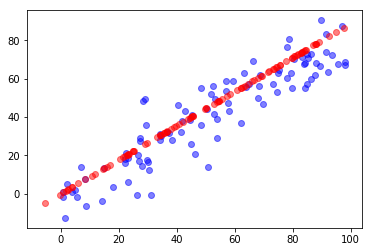

In [13]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)
plt.show()

#### 使用 `scikit-learn` 中的 PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.components_

array([[-0.7478798 , -0.66383416]])

In [17]:
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

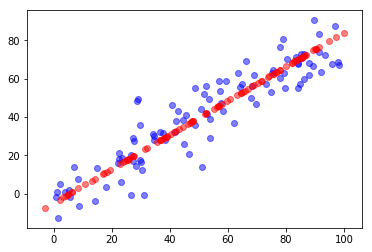

In [18]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)
plt.show()

### 7-6 scikit-learn 中的 PCA

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [20]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [22]:
X_train.shape

(1347, 64)

In [23]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: user 4.25 ms, sys: 4.25 ms, total: 8.5 ms
Wall time: 10.7 ms


In [24]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [26]:
%%time 
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 7.46 ms, sys: 0 ns, total: 7.46 ms
Wall time: 8.34 ms


In [27]:
knn_clf.score(X_test_reduction, y_test)

0.6066666666666667

#### 主成分所解释的方差

In [28]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [29]:
pca.explained_variance_

array([175.90066519, 165.86177754])

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

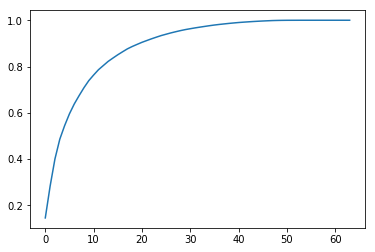

In [31]:
plt.plot([i for i in range(X_train.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

In [32]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pca.n_components_

28

In [34]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [35]:
%%time 
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 4.33 ms, sys: 121 µs, total: 4.45 ms
Wall time: 3.36 ms


In [36]:
knn_clf.score(X_test_reduction, y_test)

0.98

#### 使用PCA对数据进行降维可视化

In [37]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

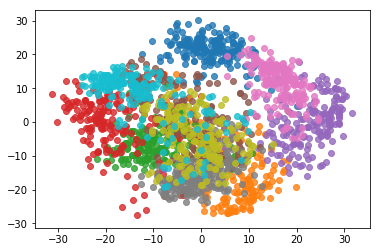

In [38]:
for i in range(10):
    plt.scatter(X_reduction[y==i,0], X_reduction[y==i,1], alpha=0.8)
plt.show()

### 7-7 试手MNIST数据集

In [ ]:
import numpy as np 
from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

mnist = fetch_mldata('MNIST original', data_home="/home/ubuntu/scikit_learn_data")
mnist

In [46]:
X, y = mnist['data'], mnist['target']
X_train = np.array(X[:60000], dtype=float)
y_train = np.array(y[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_test = np.array(y[60000:], dtype=float)

In [47]:
X_train.shape

(60000, 784)

In [48]:
y_train.shape

(60000,)

In [49]:
X_test.shape

(10000, 784)

In [50]:
y_test.shape

(10000,)

#### 使用kNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)

CPU times: user 23.8 s, sys: 0 ns, total: 23.8 s
Wall time: 23.8 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
%time knn_clf.score(X_test, y_test)

CPU times: user 13min 9s, sys: 497 ms, total: 13min 9s
Wall time: 13min 10s


0.9688

#### PCA进行降维

In [53]:
from sklearn.decomposition import PCA 

In [54]:
pca = PCA(0.90)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [58]:
X_train_reduction.shape

(60000, 87)

In [59]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction, y_train)

CPU times: user 416 ms, sys: 4.09 ms, total: 420 ms
Wall time: 418 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
%time knn_clf.score(X_test_reduction, y_test)

CPU times: user 1min 9s, sys: 27.8 ms, total: 1min 9s
Wall time: 1min 9s


0.9728

降维去除了噪音，有可能准确率更高！

### 7-8 使用PCA对数据进行降噪

#### 之前的例子

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 5, size=100)

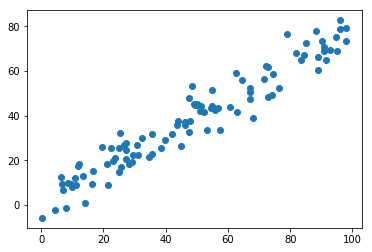

In [63]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

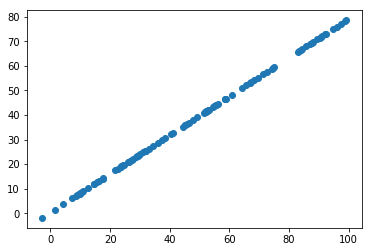

In [65]:
plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

#### 手写识别的例子

In [66]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [67]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [68]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    example_digits = np.vstack([example_digits, noisy_digits[y==num,:][:10]])

In [69]:
example_digits.shape

(100, 64)

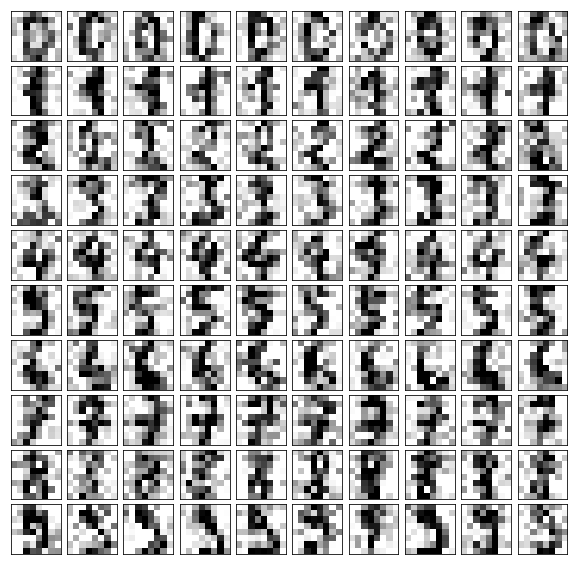

In [70]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

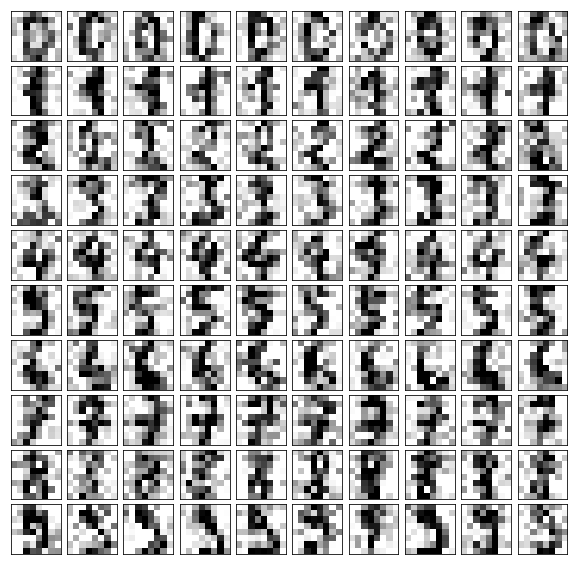

In [71]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [72]:
pca = PCA(0.5).fit(noisy_digits)
pca.n_components_

12

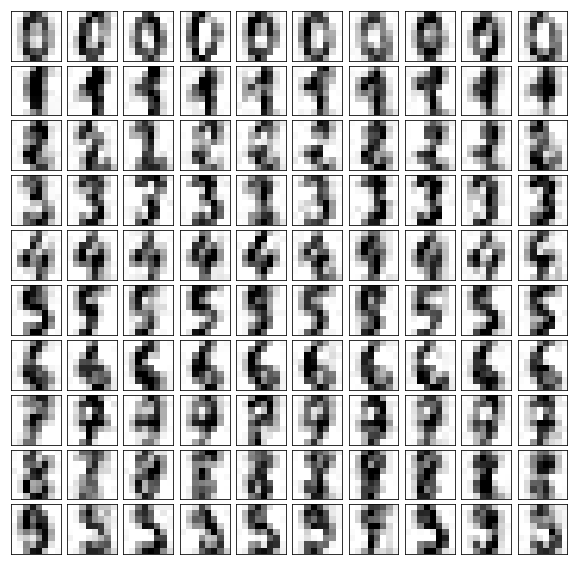

In [73]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)

### 7-9 人脸识别与特征脸

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people

In [12]:
faces = fetch_lfw_people(data_home="~/scikit_learn_data")

In [13]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [14]:
faces.data.shape

(13233, 2914)

In [15]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [16]:
faces.images.shape

(13233, 62, 47)

In [17]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]
example_faces = X[:36,:]
example_faces.shape

(36, 2914)

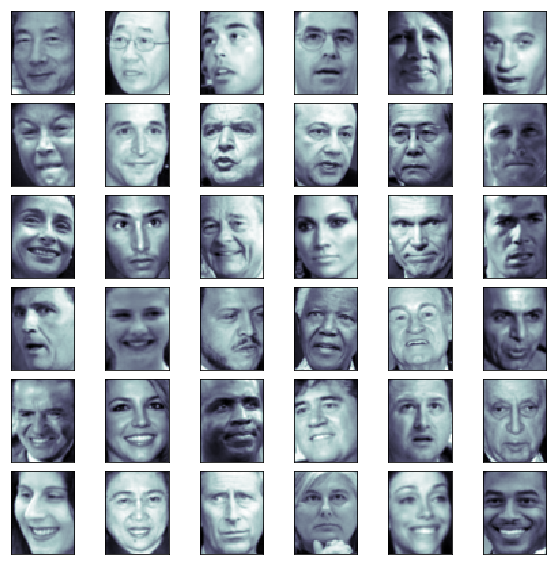

In [18]:
def plot_faces(faces):
    
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()
    
plot_faces(example_faces)

#### 特征脸

In [19]:
%%time
from sklearn.decomposition import PCA 
pca = PCA(svd_solver='randomized')
pca.fit(X)

CPU times: user 6min 20s, sys: 1min 17s, total: 7min 38s
Wall time: 2min 26s


In [20]:
pca.components_.shape

(2914, 2914)

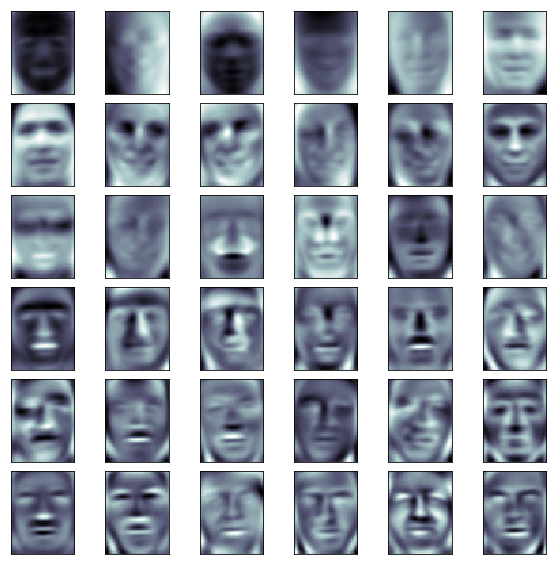

In [21]:
plot_faces(pca.components_[:36,:])

#### 更多关于lfw_people数据集

In [22]:
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [23]:
faces2.data.shape

(1348, 2914)

In [24]:
faces2.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [25]:
len(faces2.target_names)

8